In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [97]:
df = pd.read_parquet('/Users/ronitguptaaa/Documents/Excel Analysis/Project-1_DS/Fact_EmployeeDetails')

In [98]:
features = df.drop(columns=['RespondentID', 'Salary', 'StartDate', 'BonusStatusID'])
target_salary = df['Salary']

In [99]:
scaler = StandardScaler()

feature_scaled = scaler.fit_transform(features)

In [100]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(feature_scaled, target_salary, test_size=0.2, random_state=42)

In [101]:
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [102]:
y_pred_lr = model.predict(feature_scaled)

In [103]:
df['Predicted Salary'] = y_pred_lr

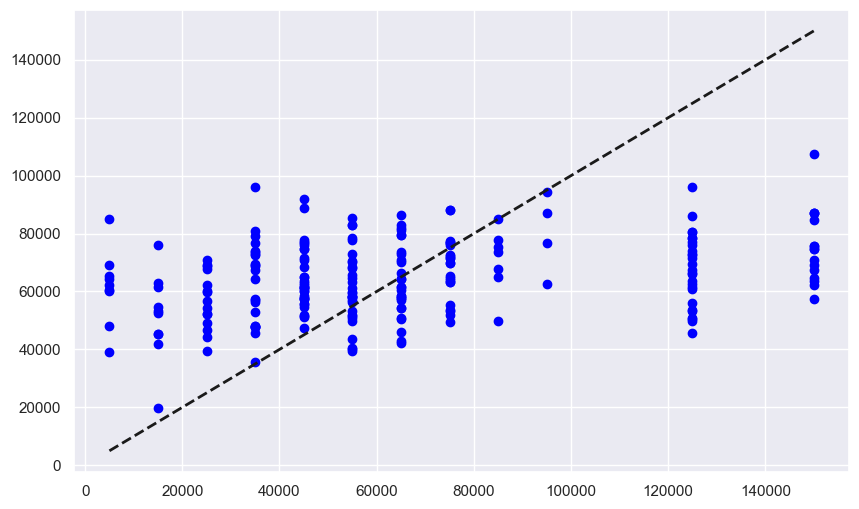

In [104]:
plt.figure(figsize=(10,6))
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2)
plt.scatter(df['Salary'], df['Predicted Salary'], color='blue')

In [105]:
target_bonus = df['BonusStatusID']

In [106]:
X_train_logReg, X_test_logReg, y_train_logReg, y_test_logReg = train_test_split(feature_scaled, target_bonus, test_size=0.2, random_state=42)

In [107]:
moedl_logReg = LogisticRegression()
moedl_logReg.fit(X_train_logReg, y_train_logReg)

LogisticRegression()

In [108]:
y_pred_logReg = moedl_logReg.predict(feature_scaled)

In [109]:
df['Predicted BonusStatusID'] = y_pred_logReg

In [110]:
accuracy = accuracy_score(target_bonus, y_pred_logReg)

In [111]:
print(accuracy)

0.6535087719298246


In [112]:
cm = confusion_matrix(target_bonus,y_pred_logReg)
cm

array([[ 41,  51],
       [ 28, 108]])

<Axes: >

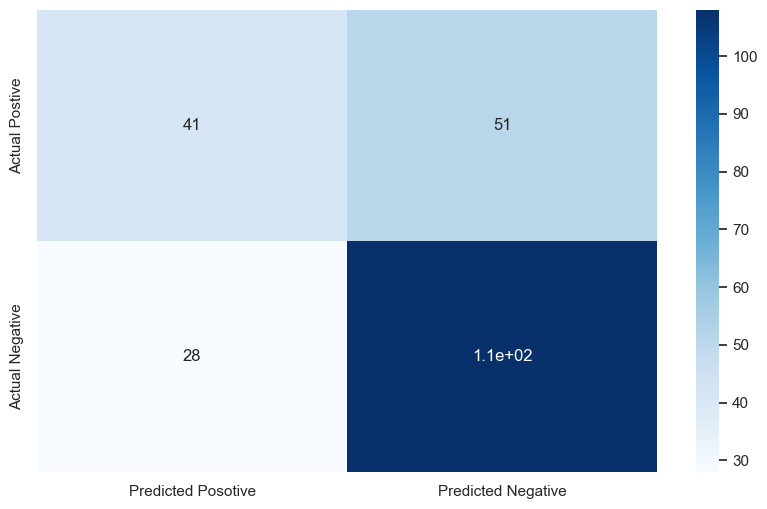

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted Posotive', 'Predicted Negative'], yticklabels=['Actual Postive', 'Actual Negative'])

In [114]:
inertia = []
k = range(1,11)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(feature_scaled)
    inertia.append(km.inertia_)

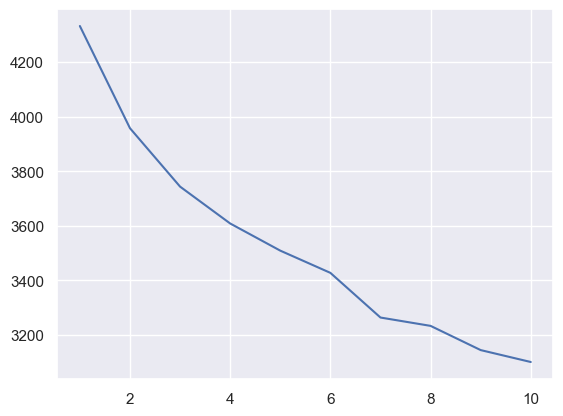

In [115]:
plt.plot(k, inertia)

In [116]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(feature_scaled)
clusters = km.labels_

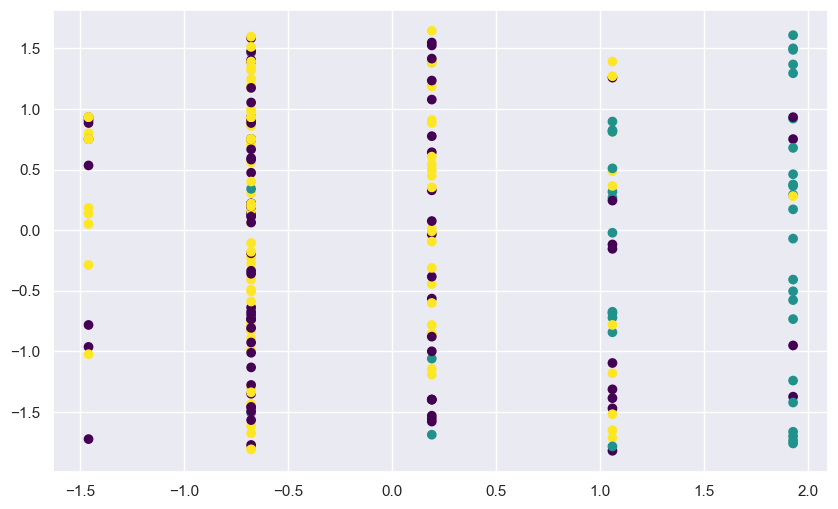

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(feature_scaled[:, features.columns.get_loc('Age')], feature_scaled[:, features.columns.get_loc('JobTitleID')], c=clusters, cmap='viridis')